In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
df = pd.read_csv("data.csv",header=None,names=["Broker","Status","Price","Beds","Baths","Lot Size","Building Area","Address1","Address2"])

In [8]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140 entries, 0 to 7139
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Broker    7116 non-null   object
 1   Status    7140 non-null   object
 2   Price     7140 non-null   object
 3   Beds      7140 non-null   object
 4   Baths     7140 non-null   object
 5   Lot Size  7140 non-null   object
 6   Area      7140 non-null   object
 7   Address1  7140 non-null   object
 8   Address2  7140 non-null   object
dtypes: object(9)
memory usage: 502.2+ KB
None


,Broker,Status,Price,Beds,Baths,Lot Size,Area,Address1,Address2
0,Brokered by Coldwell Banker Realty,For Sale,"$185,000,000",10bed,14.5+bath,2.65acre lot2.65 acre lot,"34,380sqft34,380 square feet",869 Tione Rd,"Los Angeles, CA 90077"
1,Brokered by Coldwell Banker Realty,For Sale,"$54,995,000$5M",9bed,18bath,3.6acre lot3.6 acre lot,"21,000sqft21,000 square feet",10066 Cielo Dr,"Beverly Hills, CA 90210"
2,Brokered by Ameripride Properties,For Sale,"$349,900",3bed,2bath,"8,276sqft lot8,276 square foot lot","1,992sqft1,992 square feet",13691 Gavina Ave Unit 443,"Sylmar, CA 91342"
3,Brokered by Vista Sotheby's International Realty,For Sale,"$9,500,000$1.5M",5bed,7bath,0.74acre lot0.74 acre lot,"9,375sqft9,375 square feet",13320 Mulholland Dr,"Beverly Hills, CA 90210"
4,Brokered by The Turtlestone Group Corporation,For Sale,"$65,000,000",12bed,24bath,1.03acre lot1.03 acre lot,"32,000sqft32,000 square feet",10979 Chalon Rd,"Los Angeles, CA 90077"


In [50]:
df["Price"] = df["Price"].str.split("$",expand = True)[1].str.replace(",","").astype(int)

In [59]:
df["Beds"] = df["Beds"].str.split("bed",expand = True)[0].astype("float")

In [51]:

df["Baths"] = df["Baths"].str.split("bath",expand = True)[0].str.split('+',expand = True)[0].astype("float")

In [52]:
def lot_to_sqft(lot):
    if len(lot.split("acre")) == 1:
        return int(lot.split("sqft")[0].replace(",",''))
    else :
        return float(lot.split("acre")[0].replace(",",'')) * 43560
        

In [53]:
df["Lot Size"]= df["Lot Size"].apply(lot_to_sqft).astype("int64")

In [54]:
df["Building Area"] = df["Building Area"].str.split("sqft",expand = True)[0].str.replace(",","").astype(int)

In [56]:
def clear_broker_names(broker):
    broker = str(broker)
    try:    
        index = broker.index("by")
        return broker[index + 3:]
    except ValueError:
        return broker

In [57]:
df["Broker"] = df["Broker"].apply(clear_broker_names)

In [ ]:
sns.histplot(df["Lot Size"])

<Axes: ylabel='Broker'>

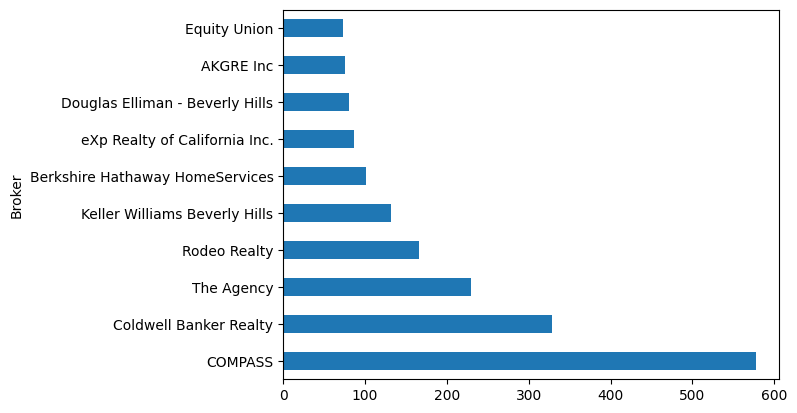

In [73]:
df["Broker"].value_counts(ascending=False)[:10].plot(kind = "barh")

<Axes: xlabel='Status'>

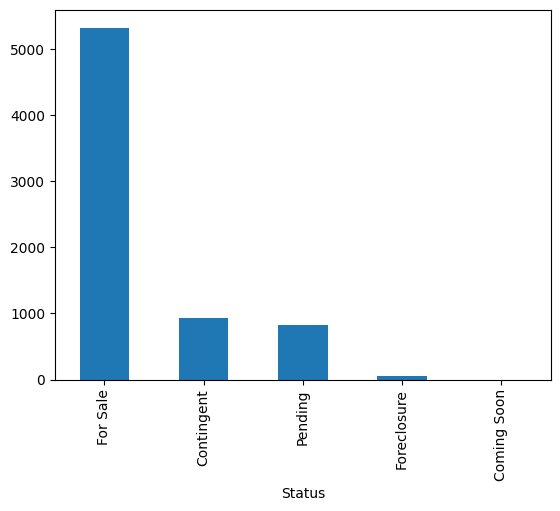

In [79]:
df["Status"].value_counts().sort_values(ascending = False).plot(kind = "bar")

In [ ]:
df.groupby("Broker")["Price"].mean().sort_values()[:10]

In [38]:
df.groupby("Address2")["Price"].median().sort_values()[:10]

Address2
California City, CA 90034      10000.0
Lancaster, CA 93536            25000.0
Bel Air, CA 90049              25000.0
Twentynine Palms, CA 92277     25000.0
Beverly Hills, CA 90077        30000.0
Highland Park, CA 90065        40000.0
Los Angeles, CA 93535          48900.0
Los Angeles, CA 93536          60000.0
Tujunga, CA 91402              98000.0
Los Angeles, CA 91306         120000.0
Name: Price, dtype: object

<Axes: ylabel='Status'>

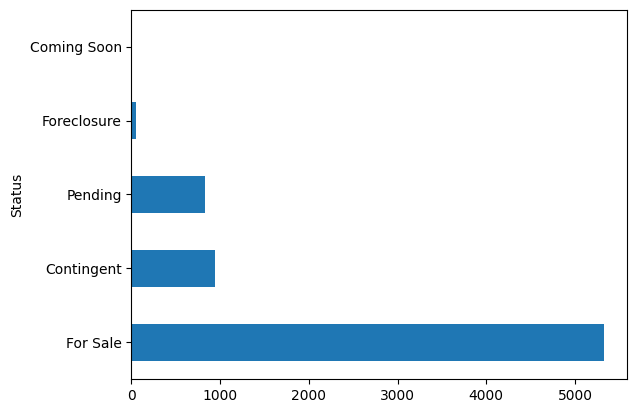

In [128]:
df["Status"].value_counts().plot(kind= "barh")

In [130]:
df["Address1"].nunique()

6754

In [131]:
!jupyter nbconvert --to script dfd.ipynb

[NbConvertApp] Converting notebook dfd.ipynb to script
[NbConvertApp] Writing 4534 bytes to dfd.py
